# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

# Loading the dataset


In [2]:
data = pd.read_csv("/Users/stefanoshadjiefstathiou/Documents/Datascience/Projects/Credit Card fraud Detection/sklearn/creditcard.csv")

# Exploring

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Credit Card information


In [5]:
# checking for missing values and datatypes
print(data.info())

#missing values cross ckecking
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# In Column "Class" 0=Normal, 1= Fraud
# Now we will separate the data

In [7]:
normal = data[data["Class"]==0]
fraud = data[data["Class"]==1]


# Statistical Measures

In [8]:
#exploring the amount 
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
# Findig mean values of columns after grouping the whole data by class

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Now we will balance the data 
# we want to have 492 normal and 492 fraud transactions

In [11]:
normal_sample = normal.sample(n=492)

normal_sample.Amount.describe()

count     492.000000
mean      114.391687
std       371.582559
min         0.000000
25%         5.685000
50%        20.265000
75%        80.985000
max      5707.820000
Name: Amount, dtype: float64

# Concating the neew dataset


In [12]:
# one below the other the two data share the columns
balanced_data = pd.concat([normal_sample, fraud], axis=0)
balanced_data.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [13]:
#mean of balanced data after grouping
balanced_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96208.355691,0.088056,-0.187314,-0.068853,0.033898,-0.009928,-0.059888,0.024995,-0.035631,-0.024272,...,-0.010278,0.001714,-0.057846,-0.015389,-0.026441,-0.029288,-0.051999,0.006122,0.007418,114.391687
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting data into features and targets


In [14]:
X = balanced_data.drop(columns='Class',axis=1)
Y = balanced_data.Class

In [15]:
#stratify=Y keep the balance when splitting 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2 )

print(X.shape,X_train.shape,X_test.shape)



(984, 30) (787, 30) (197, 30)


# Logistic Regression Model Training
# Due to the binary nature of the Class column
# Logistic Regression is a good option 

In [16]:
model = LogisticRegression()

#traing the model with training data
model.fit(X_train,Y_train)


LogisticRegression()

# Model Evaluation - Accuracy


# Training Accuracy

In [17]:
#accuracy in training data
X_train_predict = model.predict(X_train)
training_accuracy = accuracy_score(X_train_predict,Y_train)

In [18]:
print("Accuracy Score of training data: " + str(round(training_accuracy,3)))

Accuracy Score of training data: 0.939


<Axes: xlabel='Amount', ylabel='Class'>

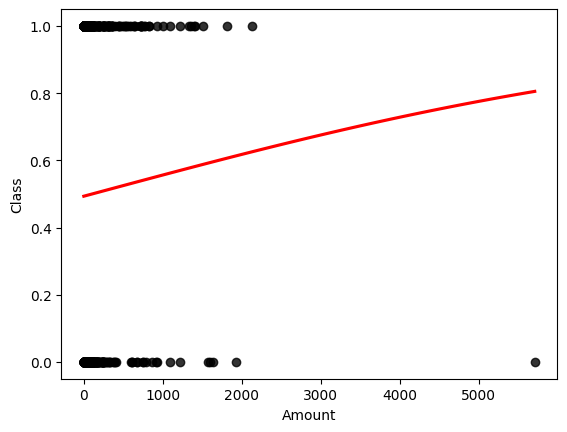

In [27]:
#define the predictor variable and the response variable
X_train_amount= X_train['Amount']

# import seaborn as sns
# #plot logistic regression curve with black points and red line
# sns.regplot(x=X_train_amount, y=Y_train, logistic=True, ci=None,
#             scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

# Testing Accuracy

In [19]:
X_test_predict = model.predict(X_test)
test_accuracy = accuracy_score(X_test_predict,Y_test)

In [20]:
print("Accuracy Score of test data: " + str(round(test_accuracy,3)))

Accuracy Score of test data: 0.914


# CONCLUSION


## The model performs very well beacuse both training and testing data have not only high but similar scores.
## This means that we have avoided underfitting and overfitting